In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:/Users/ANIKET/PythonCourseFiles/Diwali_Sales_Data_Analysis/Diwali Sales Data.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#delete blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [9]:
#checking null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#deleting rows having null values
df.dropna(inplace=True)

In [11]:
#checking rows containing null value removed
df.shape

(11239, 13)

In [12]:
#change datatype of Amount column
df['Amount']=df['Amount'].astype('int')

In [13]:
#checking data types of column
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [14]:
#describe numeric data in dataframe
df[['Amount','Orders','Age']].describe()

,Amount,Orders,Age
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,2.489634,35.410357
std,5222.355168,1.114967,12.753866
min,188.000000,1.000000,12.000000
25%,5443.000000,2.000000,27.000000
50%,8109.000000,2.000000,33.000000
75%,12675.000000,3.000000,43.000000
max,23952.000000,4.000000,92.000000


# EDA: Exploratory Data Analysis

# Gender

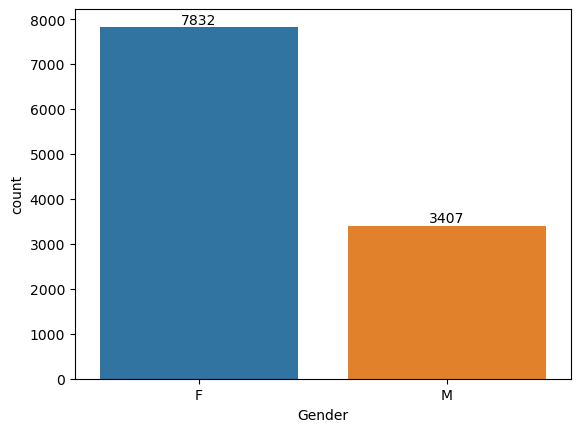

In [15]:
count_gen=sns.countplot(x='Gender', data=df)

for x in count_gen.containers:
    count_gen.bar_label(x)

Text(0, 0.5, 'Amount in Crores')

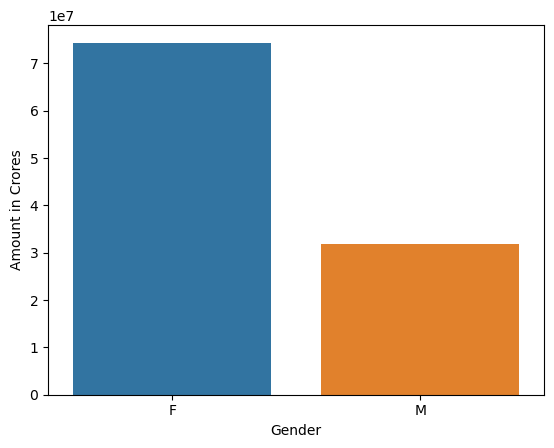

In [16]:
df1=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
graph1=sns.barplot(x='Gender',y='Amount',data=df1)
graph1.set_ylabel('Amount in Crores')


Conclusion:- From above graphs data we can see female have more purchasing power than male.

# Age

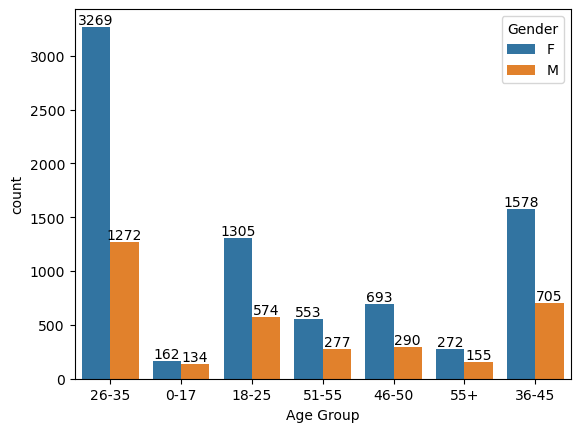

In [17]:
count_gen=sns.countplot(x='Age Group', data=df, hue='Gender')

for x in count_gen.containers:
    count_gen.bar_label(x)

Text(0, 0.5, 'Amount in Crores')

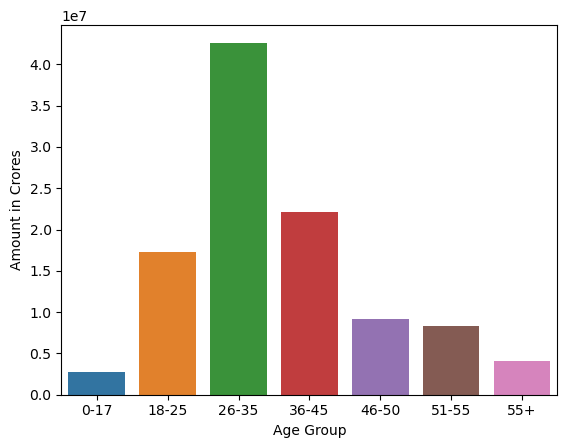

In [18]:
df2=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Age Group', ascending=True)
agraph2=sns.barplot(x='Age Group',y='Amount',data=df2)
agraph2.set_ylabel('Amount in Crores')


Conclusion: From above graphs data we can see that most buyers are from age group 26-35 females

# State

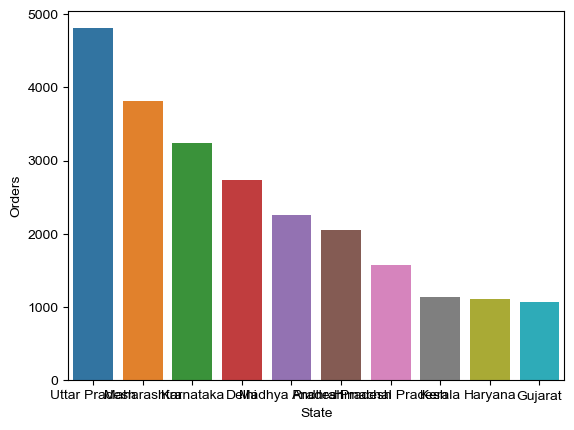

In [19]:
df3=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
graph3=sns.barplot(x='State',y='Orders',data=df3)
sns.set(rc={'figure.figsize':(20,5)})

<Axes: xlabel='State', ylabel='Amount'>

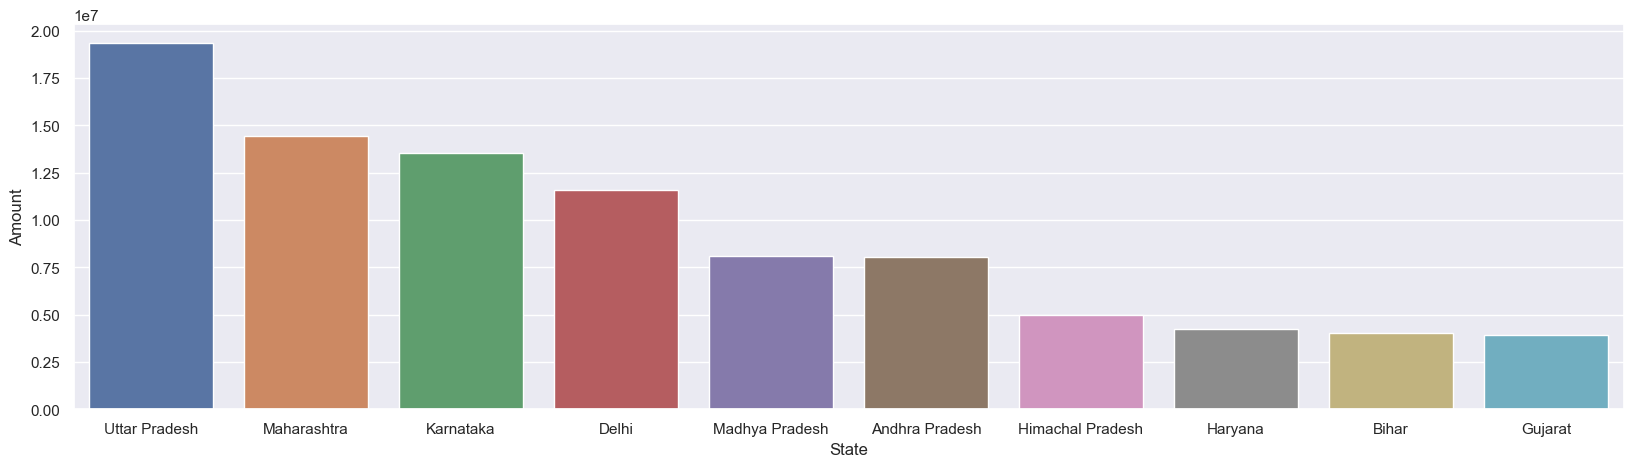

In [20]:
df4=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='State', y='Amount', data=df4)

Conclusion: From above graphs we can see top 10 states by maximum orders & maximum amount
    U.P. , MH , KN are top 3 states by both orders & amount.
    just 1 thing from graphs that we can see Kerala is at 8th position by orders but Haryana is at 8th position by amount  

# Marrital_status

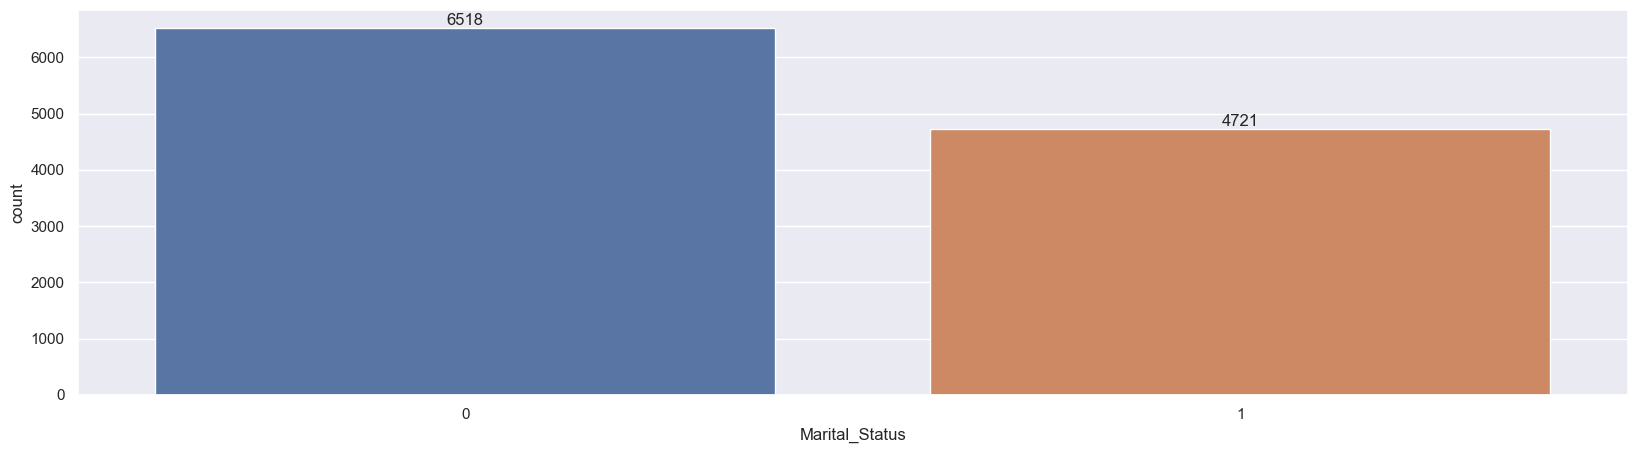

In [21]:
count_MS=sns.countplot(x='Marital_Status',data=df)

for x in count_MS.containers:
    count_MS.bar_label(x)
    

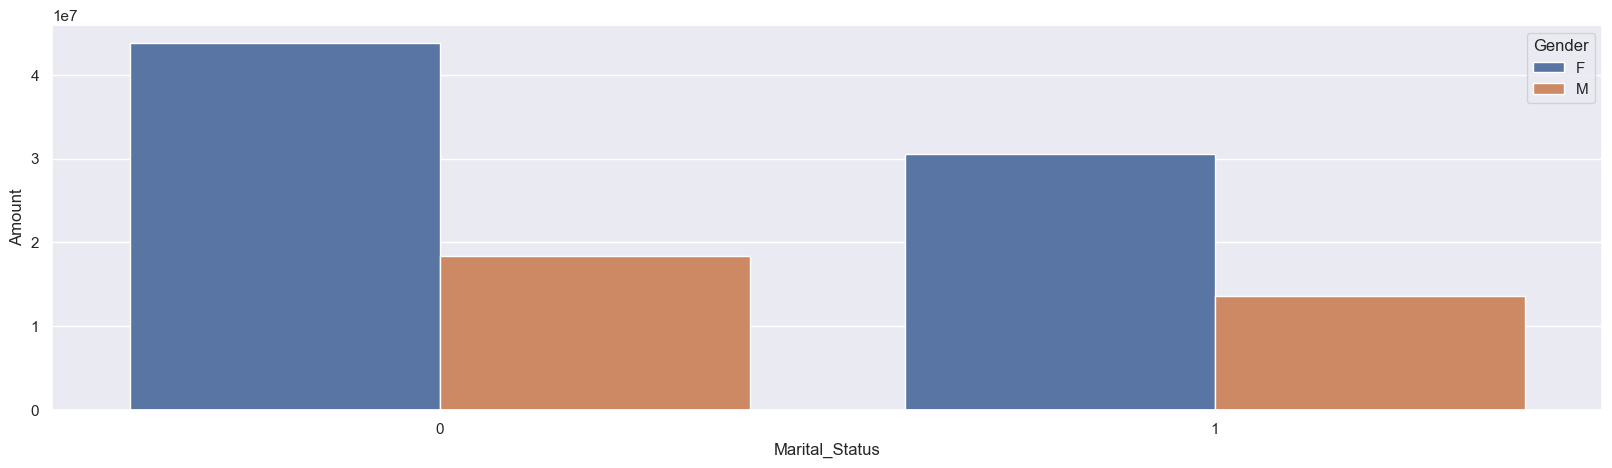

In [22]:
df5=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=df5)
sns.set(rc={'figure.figsize':(15,10)})

Conclusion: We can say that married female is most buying group as per dataframe

# Occupation

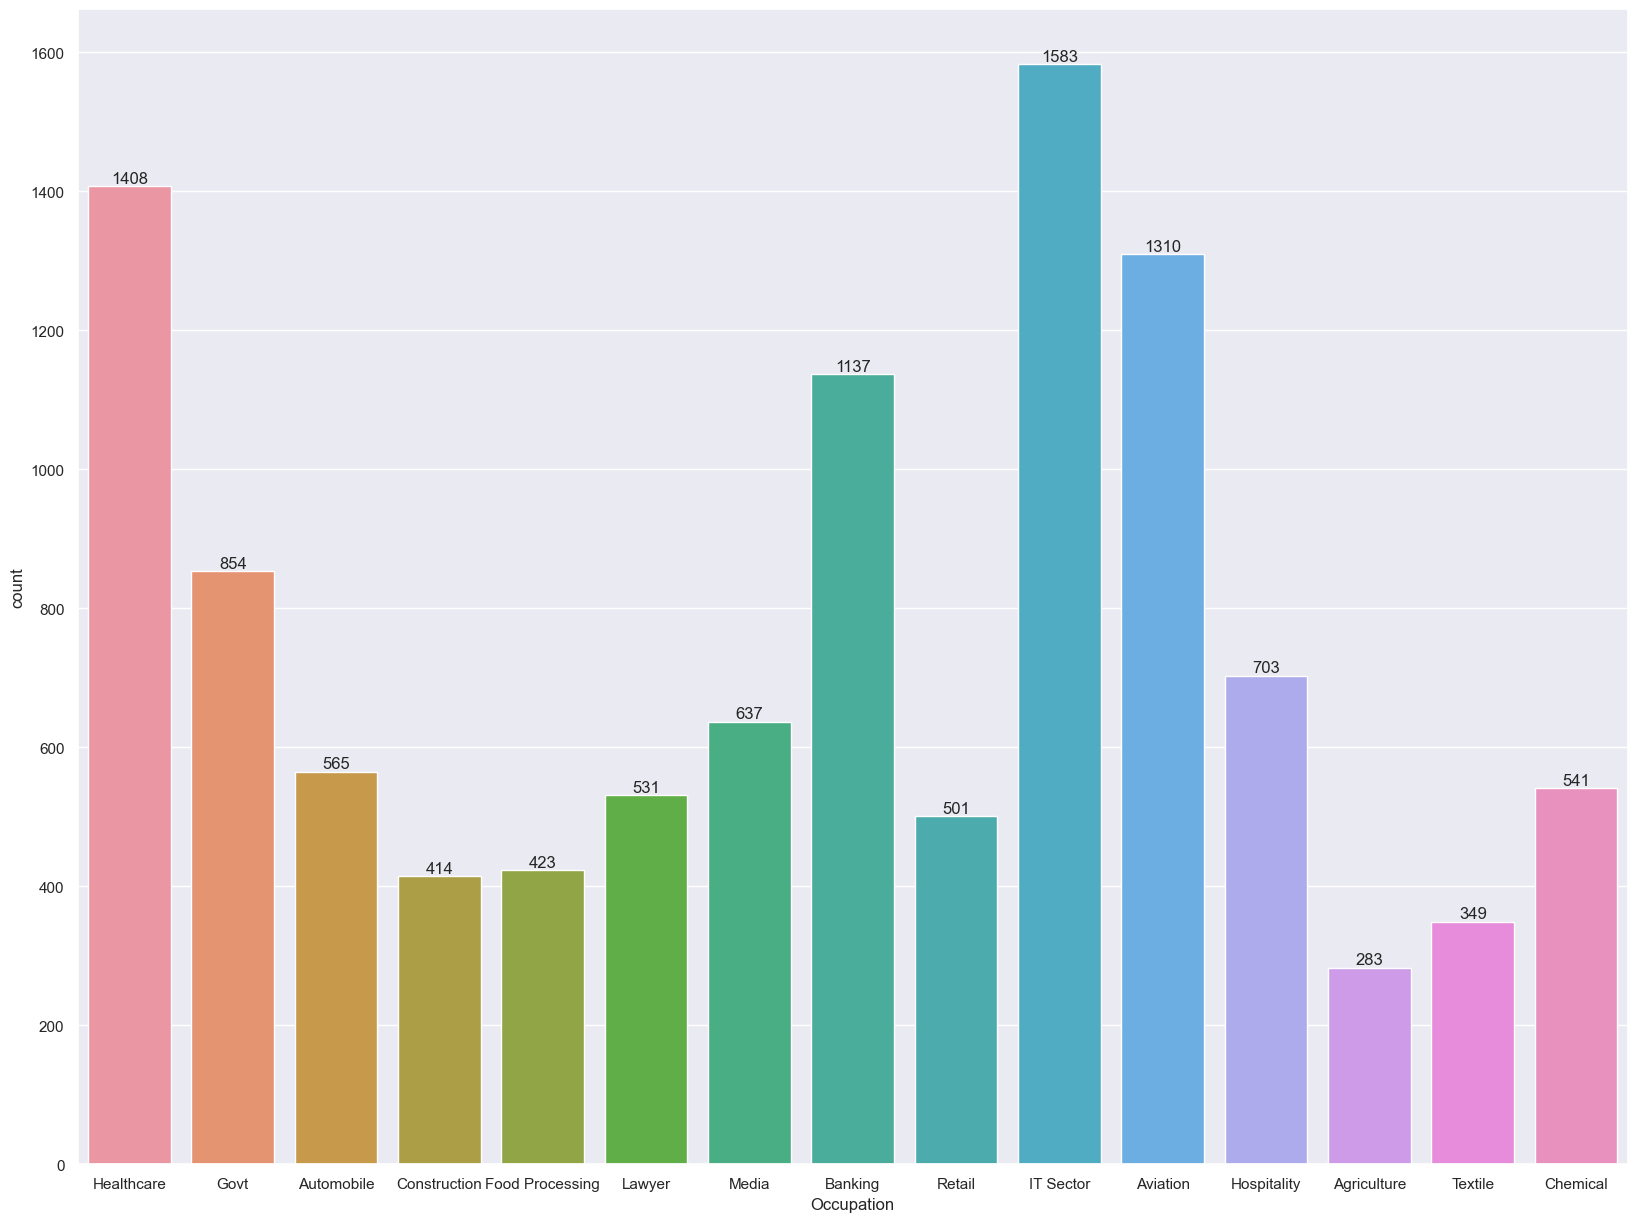

In [23]:
sns.set(rc={'figure.figsize':(20,15)})
count_occ=sns.countplot(x='Occupation', data=df)

for x in count_occ.containers:
    count_occ.bar_label(x)

<Axes: xlabel='Occupation', ylabel='Amount'>

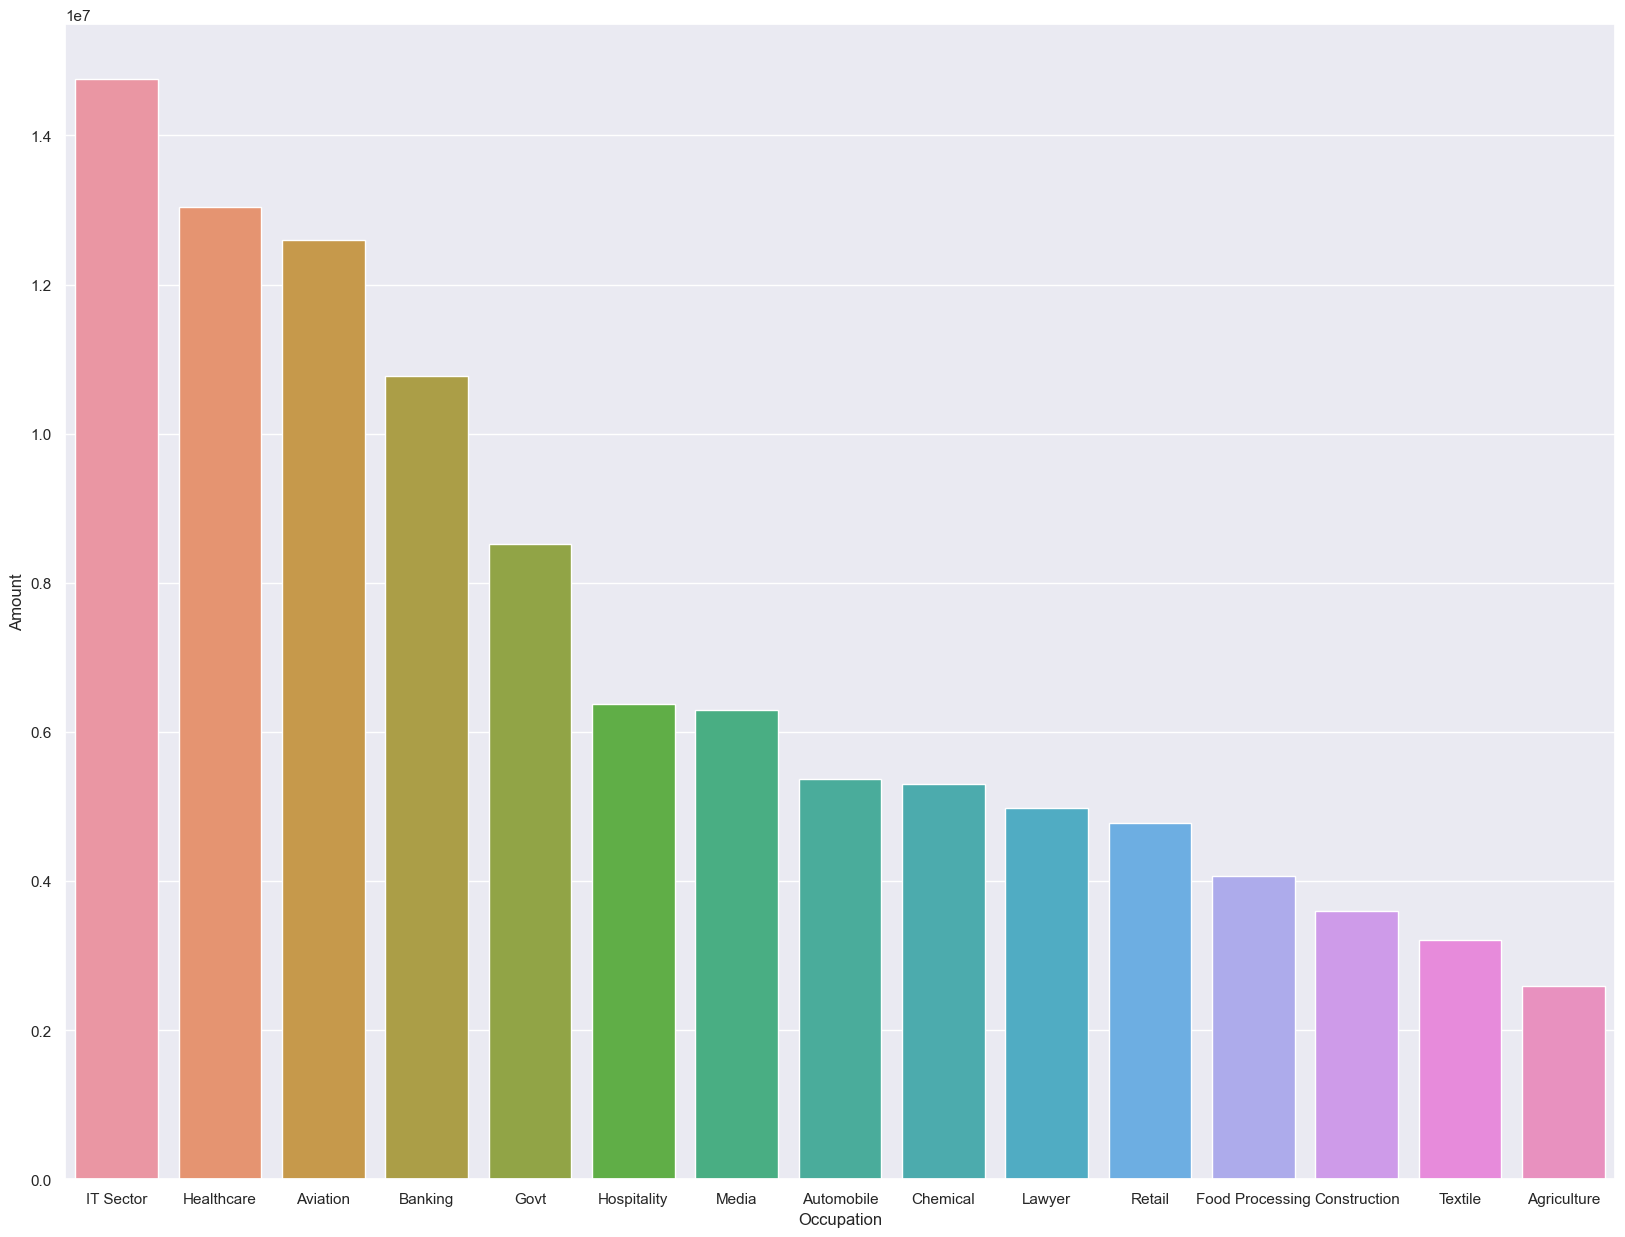

In [24]:


df6=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Occupation',y='Amount', data=df6)

Conclusion: Most buyers are from IT Sector followed by Healthcare emplyoees

# Product_Category

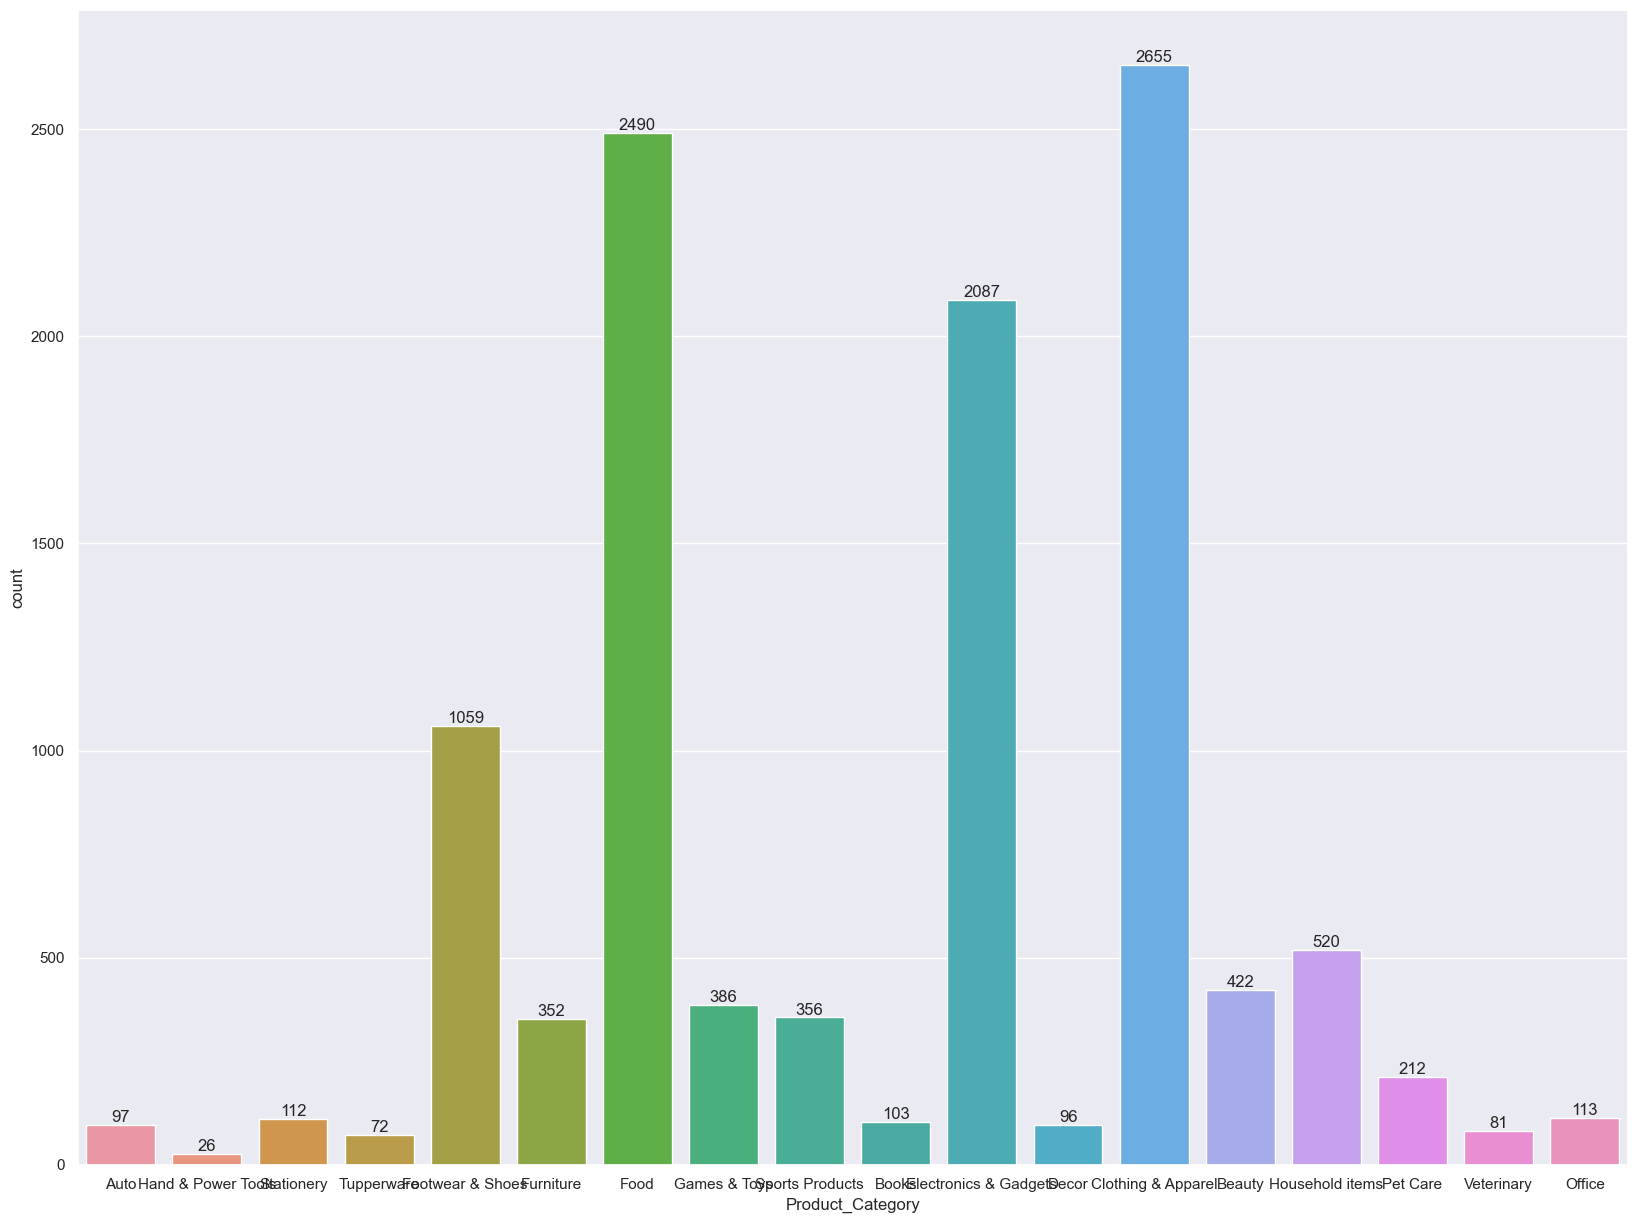

In [25]:
ax=sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(20,15)})

for x in ax.containers:
    ax.bar_label(x)

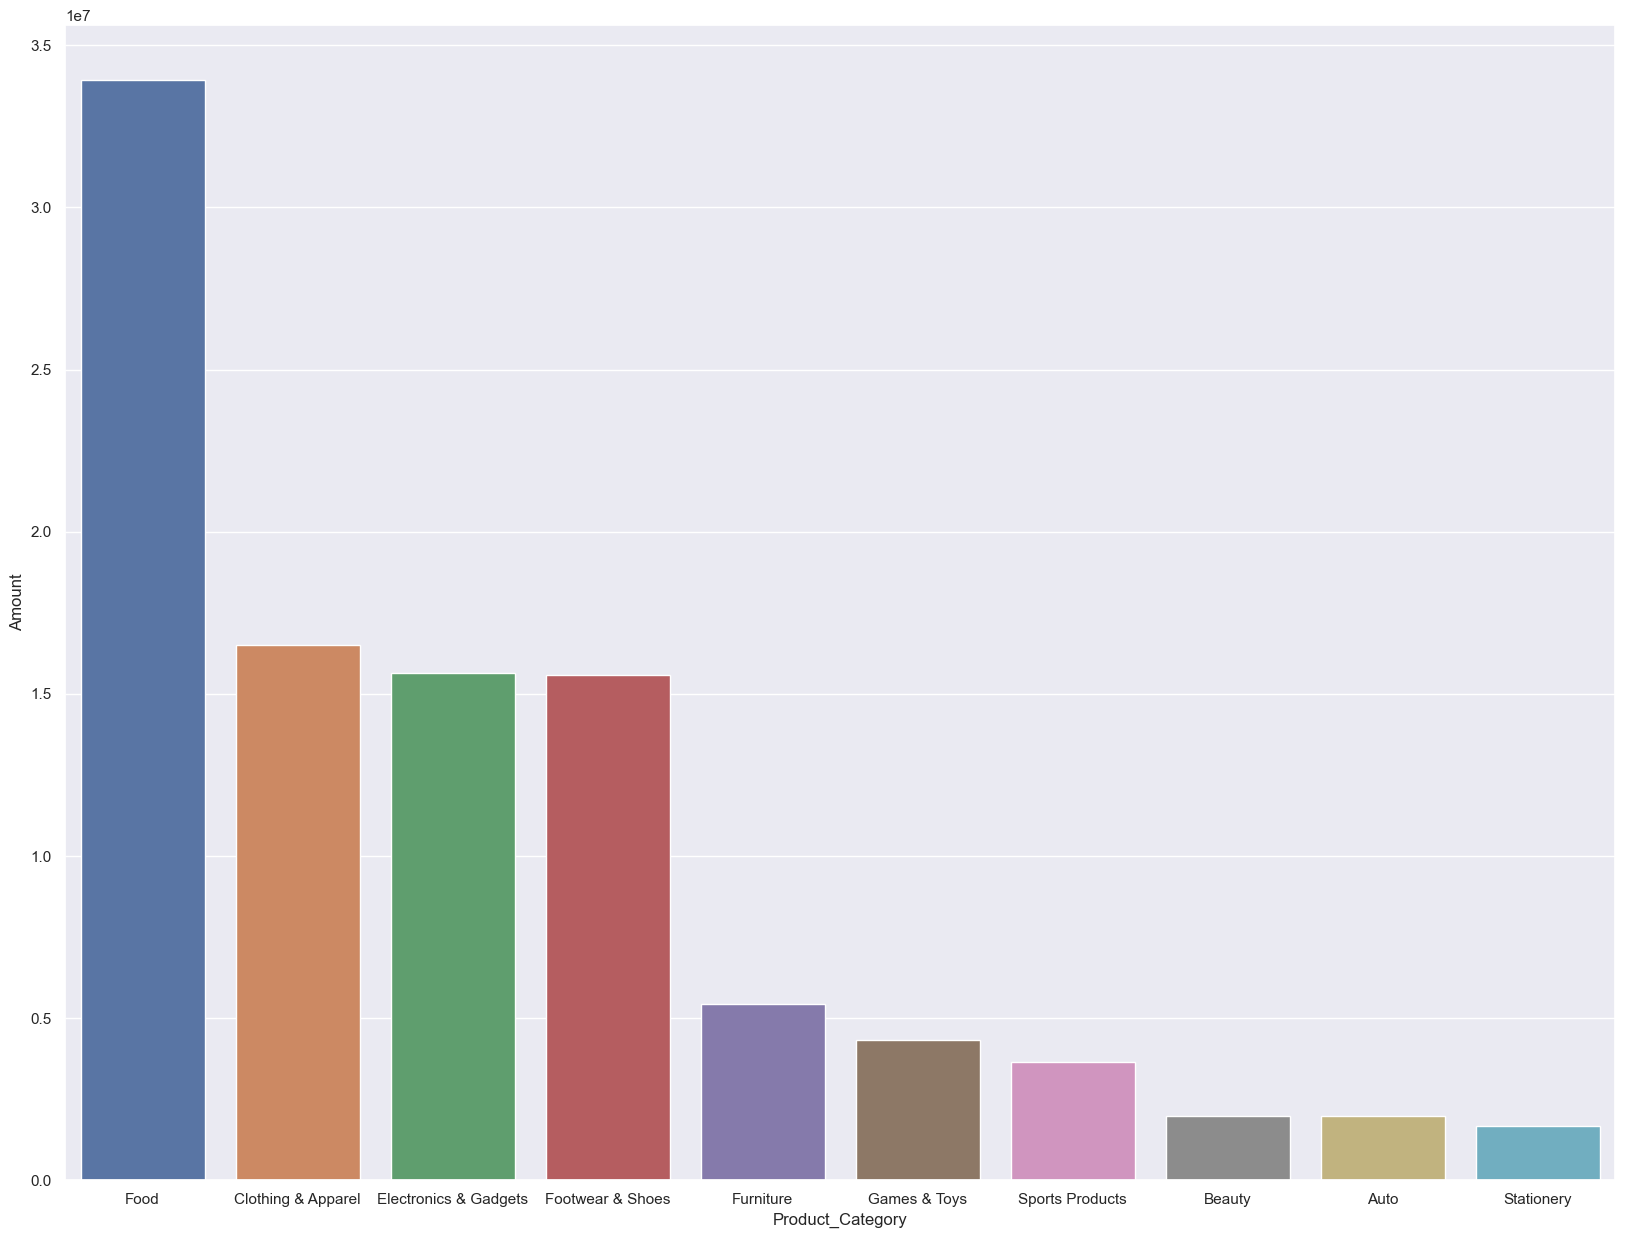

In [26]:
State_Sales=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data=State_Sales, x='Product_Category', y='Amount')
sns.set(rc={'figure.figsize':(15,18)})

Conclusion:- we can see most of purchased products are from Food, clothings.

<Axes: xlabel='Product_ID', ylabel='Orders'>

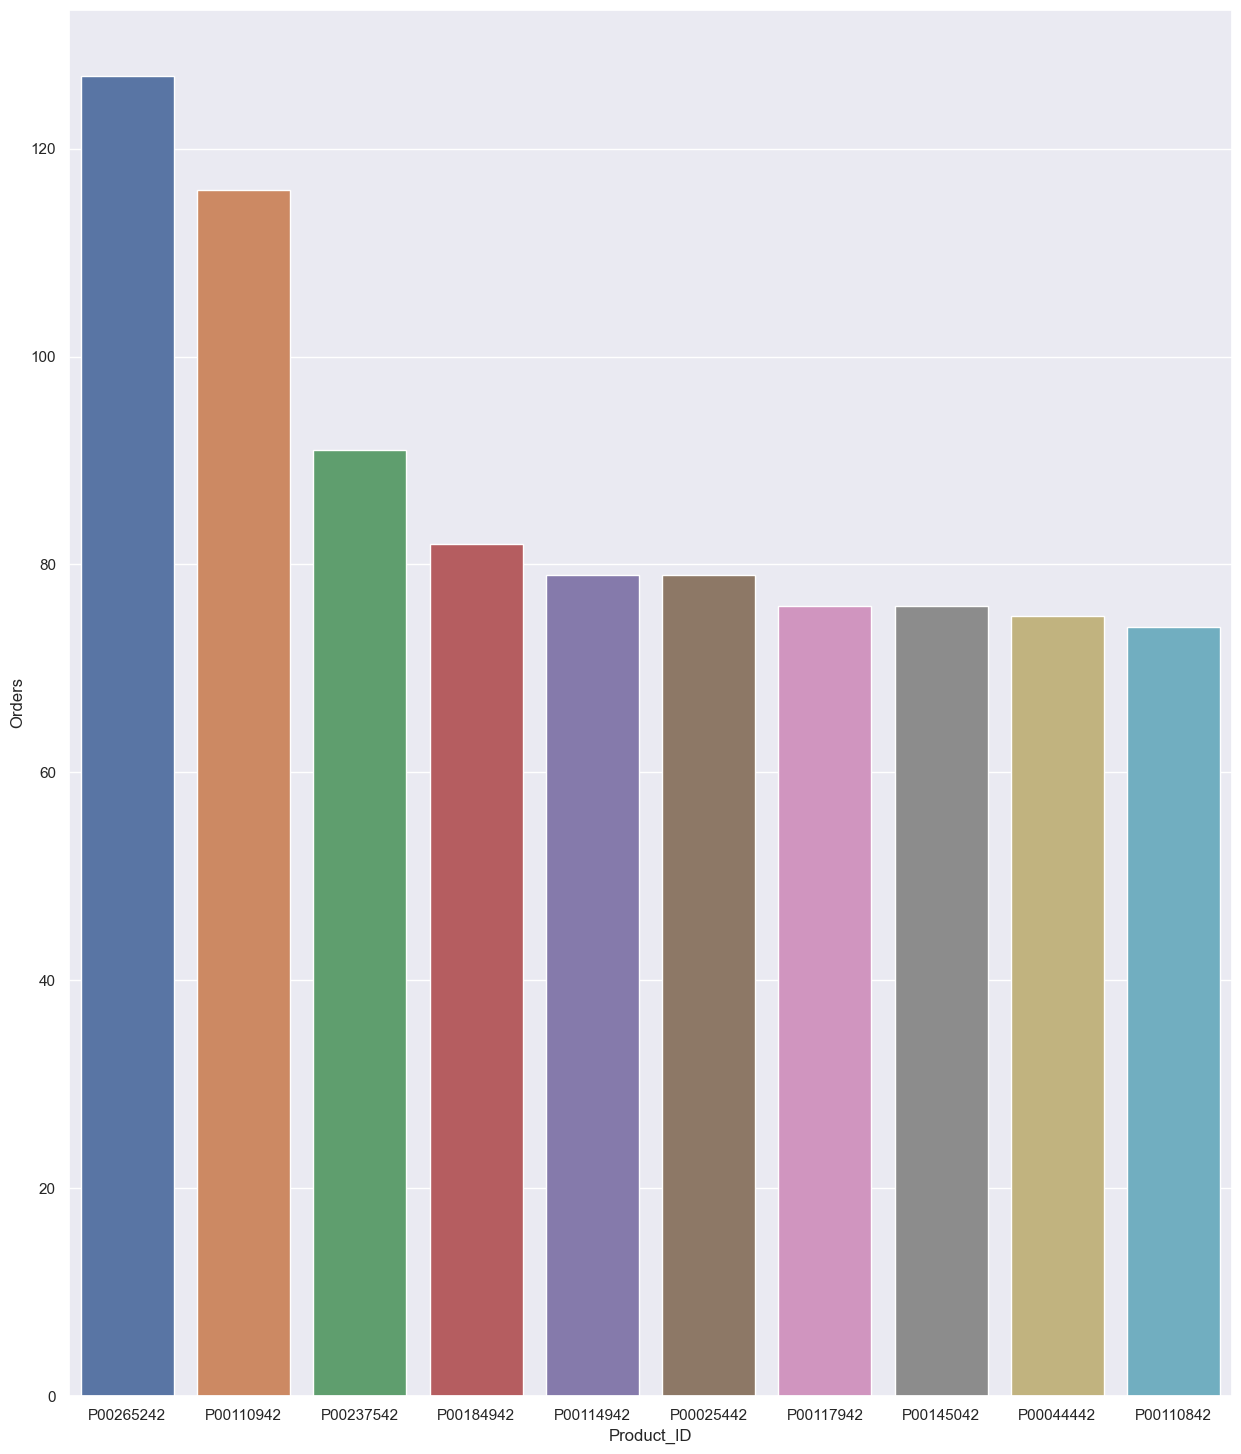

In [27]:
#top 10 maximum sold products
State_Sales=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data=State_Sales, x='Product_ID', y='Orders')
#sns.set(rc={'figure.figsize':(15,18)})

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# Final Conclusion:- 
    From Analysis of the dataframe, we can conclude that most buyers are married females having age group 26-35 years old from UP, Maharashtra, Karnataka state who are working in IT sector,Heathcare industry and most likely they are buying food items, clothing  and electronics items.